1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

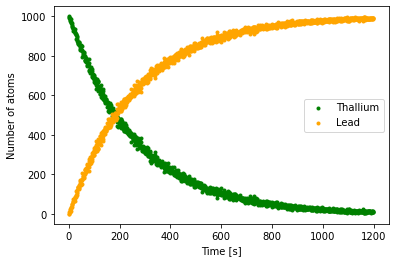

In [2]:
import matplotlib.pyplot as plt
import math as m
import numpy as np

tau=3.052*60 #seconds

def probability (t):
    return 1-2**(-t/(tau))


t=np.arange(0,1200,1)

Tl_n=[]
Pb_n=[]

for i in t:
    Tl=[]
    Pb=[]
    for s in range(1,1001):
        p=np.random.uniform(0,1) #for each atom
        if p > probability(i):
            Tl.append(1)
            Pb.append(0)
        elif p <= probability(i):
            Tl.append(0)
            Pb.append(1)     
            
            
            
    Tl_n.append(sum(Tl))
    Pb_n.append(sum(Pb))



plt.scatter(t,Tl_n, label='Thallium',marker='.', color='green')
plt.scatter(t,Pb_n, label='Lead',marker='.',color='orange')        
plt.xlabel("Time [s]")
plt.ylabel("Number of atoms")
plt.legend()

plt.show()

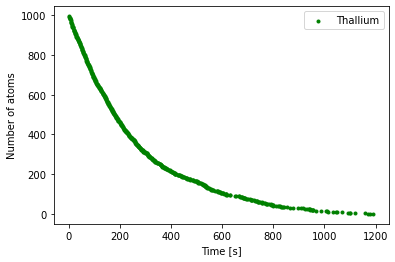

In [3]:
def probability2 (t):
    return 2**(-t/(tau)) * (m.log(2)/tau)

pi=[]
for i in t:
    pi.append(probability2(i))
    
pi=pi/sum(pi)
    
time=np.random.choice(t,size=1000,p=pi)

(unique, counts) = np.unique(time, return_counts=True)
y=1000-np.cumsum(counts)

plt.scatter(unique,y, label='Thallium',marker='.', color='green')
plt.xlabel("Time [s]")
plt.ylabel("Number of atoms")
plt.legend()

plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

alpha particles scattered back:  0.0015303383570095105 %


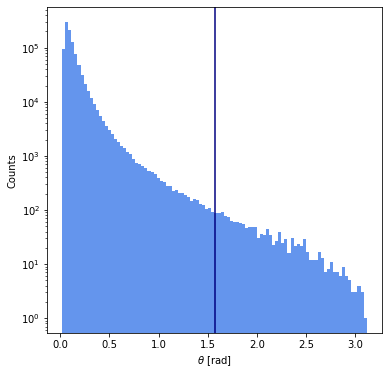

In [4]:
import scipy.constants as const

(a0, unit, uncertainty)=const.physical_constants['Bohr radius']

N=1000000
Z=79
E=7.7*10**(6)*const.e 


x=np.random.normal(0, a0/100, N)
y=np.random.normal(0, a0/100, N)

def theta(x,y): #rad
    b=np.sqrt(x**2+y**2)
    f=Z*(const.e**2) / (2*const.pi*const.epsilon_0*E*b)
    return (2 * np.arctan(f))

thetas=theta(x,y)

n_back=np.sum(thetas>np.pi/2)/np.sum(thetas<=np.pi/2)
print('alpha particles scattered back: ', n_back, '%')

plt.figure(figsize=(6,6))
plt.hist(thetas,bins=100, color='cornflowerblue')
plt.yscale('log')
plt.axvline(np.pi/2.0, color='navy')

plt.xlabel(r'$\theta$ [rad]')
plt.ylabel('Counts')
plt.show()

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [5]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2



a=0.001
b=1.999

def hit_miss(N):
    x=np.linspace(a,b,1000)
    count=0
    for i in range(N):
        x=2*np.random.random()
        y=np.random.random()
        if y<f(x): count+=1
    I=(2)*count/N
    return I

#error
N_try=[10**i for i in range (4,6)]
I_try = [hit_miss(t) for t in N_try]
err_hit_miss = np.std(I_try)

print('I =', hit_miss(40000),'+/-',err_hit_miss,'\thit-miss method')

def mean_value(N):
    x=np.random.uniform(a,b,size=N)
    y = f(x)
    std_y = np.std(y)
    error=2*std_y/np.sqrt(N)
    return (2)*np.mean(y), error


print('I =', mean_value(40000)[0],'+/-',mean_value(40000)[1],'\tmean value method')


I = 1.45345 +/- 0.003430000000000044 	hit-miss method
I = 1.4509371939751907 +/- 0.00261631490442613 	mean value method


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [6]:
def f_sph(x):
    x2 = np.sum(x**2) #N dim!
    if x2 <= 1: return 1
    else: return 0
        

def sphere_I(N,dim):
    x=np.random.uniform(-1., 1., size=(N,dim))
    func=[f_sph(x[i]) for i in range(N)]
    I = (2.0**dim)*np.mean(func)
    return I

print('I =', sphere_I(400000,2),'\t2D')
print('I =', sphere_I(4000000,10),'\t10D')

I = 3.14163 	2D
I = 2.560512 	10D


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [7]:
import random
import pandas as pd
import seaborn as sns
from scipy import stats

def w(x):
    return 1.0/np.sqrt(x)

def inv_tr_w(x):
    return x**2/4.0

def I_w(x,y):
    return 2.0*(np.sqrt(y) - np.sqrt(x))

def func(x):
    return x**(-0.5) / (np.exp(x) + 1)

def I_imp_samp(N, a, b):
    xs=np.random.uniform(a, b, size=N)
    ws=inv_tr_w(x)
    frac=func(ws) / w(ws)
    return np.mean(frac) * 2.0


print(I_imp_samp(300000,0,1))

1.0


I don't know why the result is not $\simeq0.84$ but is 1.